In [ ]:
pip install scikit-learn pandas

In [16]:
 #coding: utf-8

# In[1]:


#https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8
#get_ipython().magic(u'matplotlib inline')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # untuk visualisasi dengan library pandas
import io # untuk terkait string dst

%matplotlib inline

Seaborn adalah pustaka yang digunakan untuk visualisasi data dalam Python dan sering digunakan bersama dengan Matplotlib untuk membuat grafik yang lebih menarik dan informatif.

Setelah Anda mengimpor Seaborn dengan perintah ini, Anda dapat menggunakan fungsi-fungsi dan fitur-fitur yang disediakan oleh Seaborn untuk membuat berbagai jenis plot dan visualisasi data dengan lebih mudah. Seaborn sering digunakan dalam analisis data dan visualisasi data karena menyediakan antarmuka yang lebih tinggi daripada Matplotlib, yang membuatnya lebih mudah digunakan untuk menghasilkan grafik yang esteti

Pernyataan "%matplotlib inline" adalah perintah khusus yang digunakan dalam
lingkungan pemrograman Python ketika Anda bekerja dengan pustaka grafik atau visualisasi seperti Matplotlib dalam Jupyter Notebook atau Jupyter Lab. Pernyataan ini menginstruksikan lingkungan tersebut untuk menampilkan plot atau grafik secara langsung di dalam sel kode notebook, sehingga hasil visualisasi akan muncul di bawah sel kode yang menghasilkannya.

Ini sangat berguna saat Anda ingin melihat hasil visualisasi secara interaktif dan terintegrasi dengan kode Anda, karena Anda dapat melihat grafik yang dihasilkan tanpa harus membuka jendela pop-up atau menyimpan gambar grafik dalam file terpisah.


https://www.kaggle.com/uciml/pima-indians-diabetes-database
Dataset ini berasal dari National Institute of Diabetes and Digestive and Kidney Diseases. Tujuan dari kumpulan data adalah untuk memprediksi secara diagnostik apakah pasien menderita diabetes atau tidak, berdasarkan pengukuran diagnostik tertentu yang termasuk dalam kumpulan data. Beberapa kendala ditempatkan pada pemilihan contoh ini dari database yang lebih besar. Secara khusus, semua pasien di sini adalah perempuan berusia minimal 21 tahun dari keturunan Pima India.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
import pandas as pd

In [7]:
#diabetes = pd.read_csv(io.BytesIO(uploaded['diabetesIndo.csv']))
diabetes = pd.read_csv("/content/drive/MyDrive/KULIAHHAP20232024/SEMGENAP20232024/BDA_semgenap2324/6Mei2024_PCAdanMachineLearning/diabetesIndo.csv")
diabetes.columns


Index(['Kehamilan', 'Glukosa', 'Tekanandarah', 'Tebalkulit', 'Insulin', 'BMI',
       'FungsiPedigree', 'Umur', 'Luaran'],
      dtype='object')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

In [ ]:
diabetes.head()

Kehamilan  Glukosa  Tekanandarah  Tebalkulit  Insulin   BMI  \
0          6      148            72          35        0  33.6   
1          1       85            66          29        0  26.6   
2          8      183            64           0        0  23.3   
3          1       89            66          23       94  28.1   
4          0      137            40          35      168  43.1   

   FungsiPedigree  Umur  Luaran  
0           0.627    50       1  
1           0.351    31       0  
2           0.672    32       1  
3           0.167    21       0  
4           2.288    33       1

#https://www.kaggle.com/kunalvashisht/diabetes-visualization-with-seaborn

In [8]:
print("Dimensi data diabetes : {}".format(diabetes.shape))

Dimensi data diabetes : (768, 9)


In [9]:
diabetes.tail()

Kehamilan  Glukosa  Tekanandarah  Tebalkulit  Insulin   BMI  \
763         10      101            76          48      180  32.9   
764          2      122            70          27        0  36.8   
765          5      121            72          23      112  26.2   
766          1      126            60           0        0  30.1   
767          1       93            70          31        0  30.4   

     FungsiPedigree  Umur  Luaran  
763           0.171    63       0  
764           0.340    27       0  
765           0.245    30       0  
766           0.349    47       1  
767           0.315    23       0

In [10]:
diabetes.groupby('Luaran').size()

Luaran
0    500
1    268
dtype: int64

Luaran
0    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
1    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
dtype: object

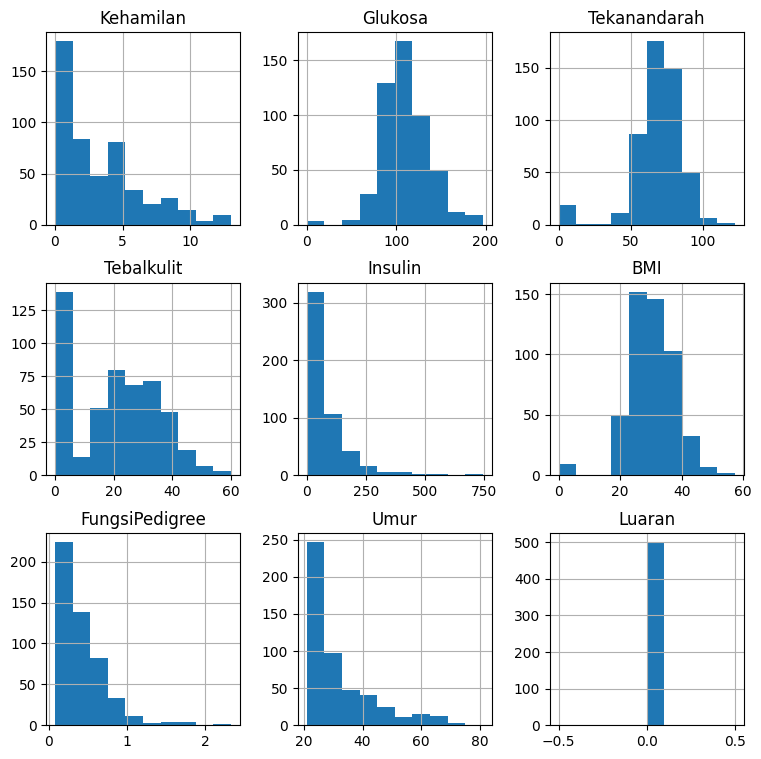

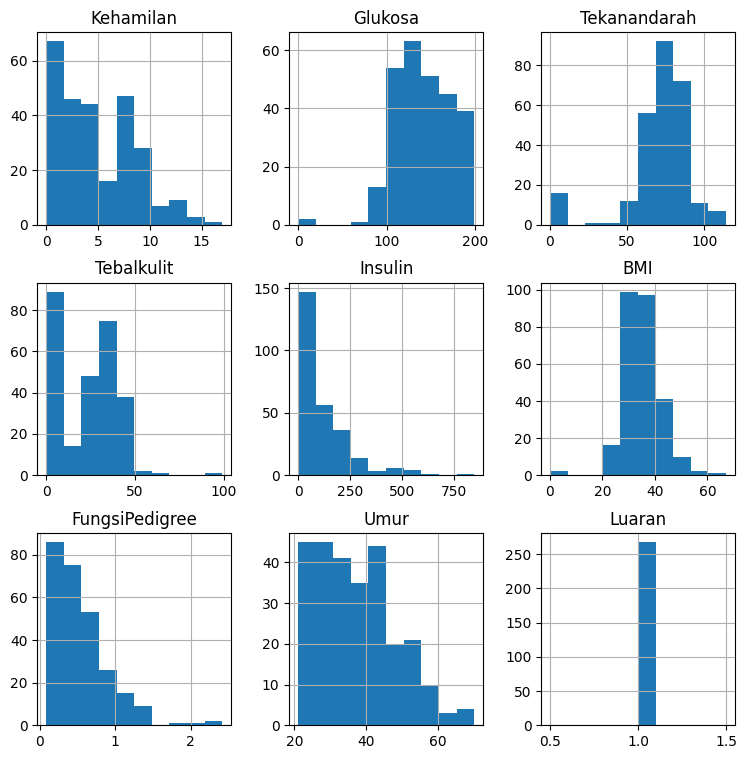

In [12]:
#Langkah 5. Menampilkan data per faktor dengan berdasarkan klasifikasi Luaran
diabetes.groupby('Luaran').hist(figsize=(9, 9))


In [13]:
#b.4  Mencermati data yang hilang
#Langkah 6. #Untuk mengenali ada tidaknya missing data, ternyata hasil menunjukkan tidak adanya data yang kosong
diabetes.isnull().sum()
diabetes.isna().sum()



Kehamilan         0
Glukosa           0
Tekanandarah      0
Tebalkulit        0
Insulin           0
BMI               0
FungsiPedigree    0
Umur              0
Luaran            0
dtype: int64

In [14]:
diabetes.describe()

Kehamilan     Glukosa  Tekanandarah  Tebalkulit     Insulin  \
count  768.000000  768.000000    768.000000  768.000000  768.000000   
mean     3.845052  120.894531     69.105469   20.536458   79.799479   
std      3.369578   31.972618     19.355807   15.952218  115.244002   
min      0.000000    0.000000      0.000000    0.000000    0.000000   
25%      1.000000   99.000000     62.000000    0.000000    0.000000   
50%      3.000000  117.000000     72.000000   23.000000   30.500000   
75%      6.000000  140.250000     80.000000   32.000000  127.250000   
max     17.000000  199.000000    122.000000   99.000000  846.000000   

              BMI  FungsiPedigree        Umur      Luaran  
count  768.000000      768.000000  768.000000  768.000000  
mean    31.992578        0.471876   33.240885    0.348958  
std      7.884160        0.331329   11.760232    0.476951  
min      0.000000        0.078000   21.000000    0.000000  
25%     27.300000        0.243750   24.000000    0.000000  
50%     32.000000        0.372500   29.000000    0.000000  
75%     36.600000        0.626250   41.000000    1.000000  
max     67.100000        2.420000   81.000000    1.000000

<Axes: xlabel='Luaran', ylabel='Glukosa'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


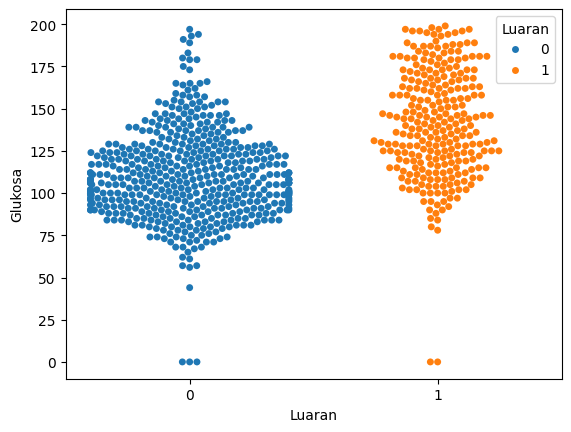

In [17]:
sns.swarmplot(x='Luaran',y='Glukosa',data=diabetes,hue='Luaran')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


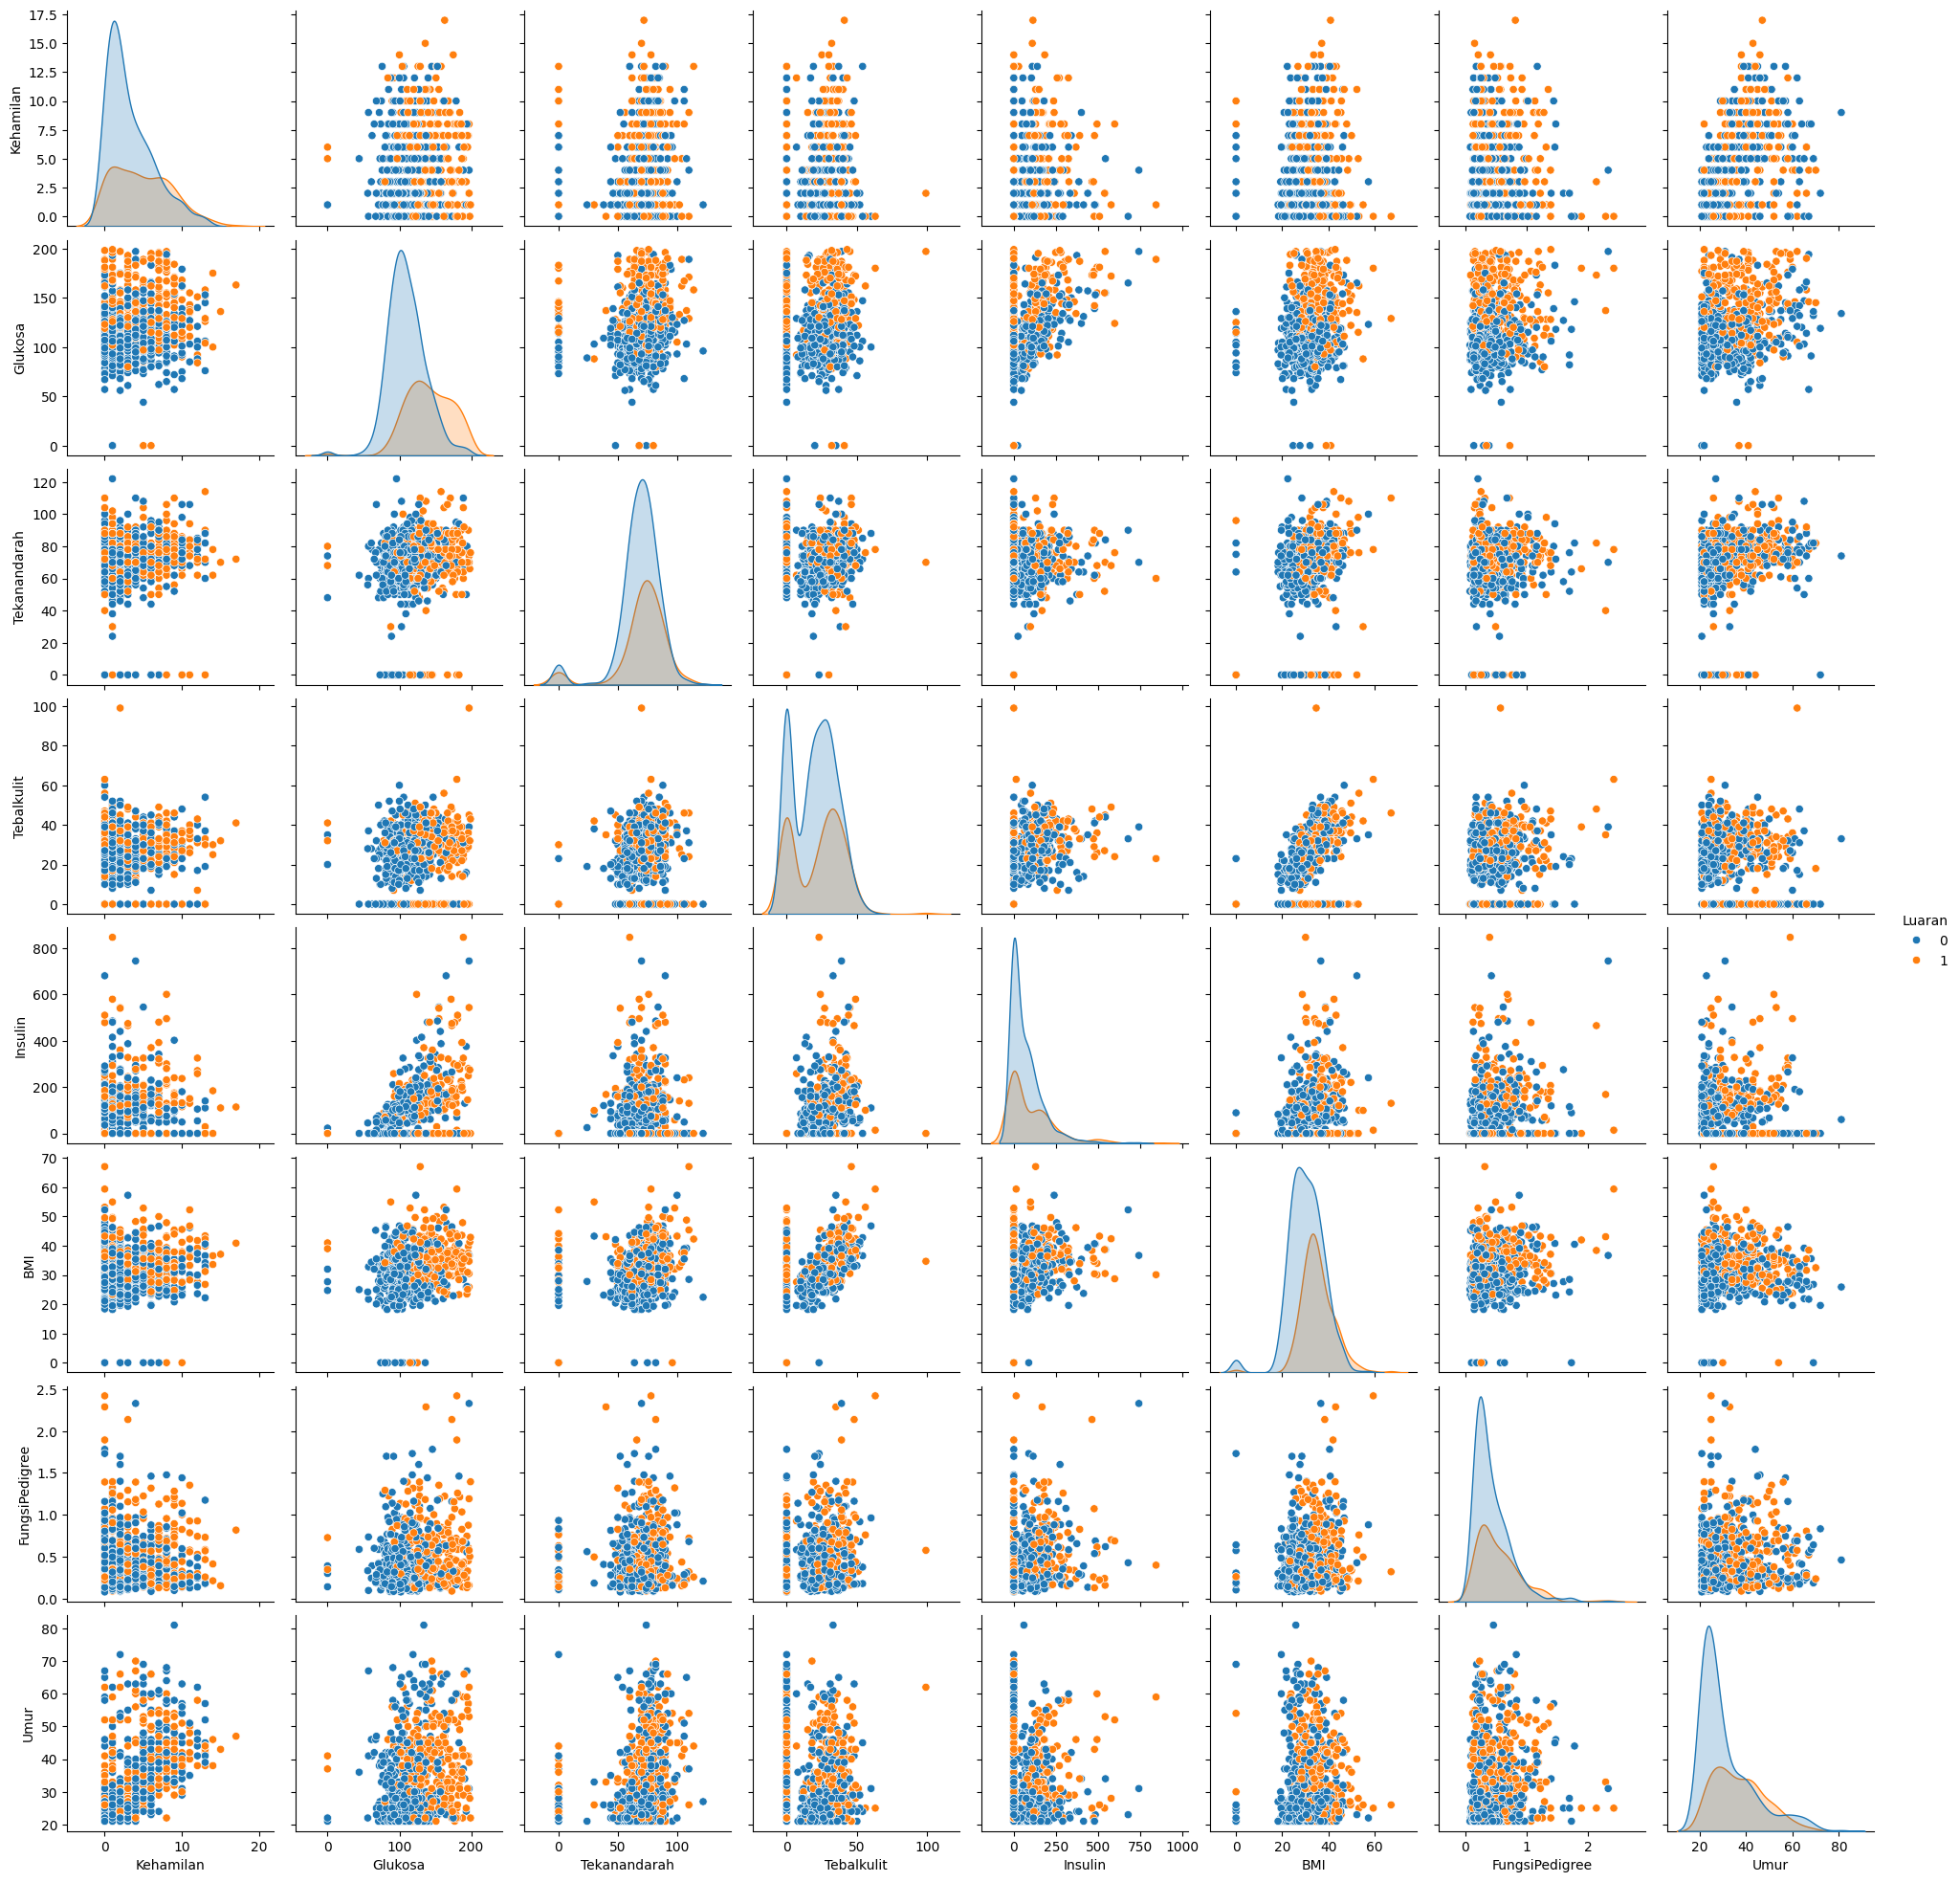

In [18]:
sns.pairplot(diabetes, hue='Luaran', size=2.5);

<Axes: xlabel='Luaran', ylabel='BMI'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


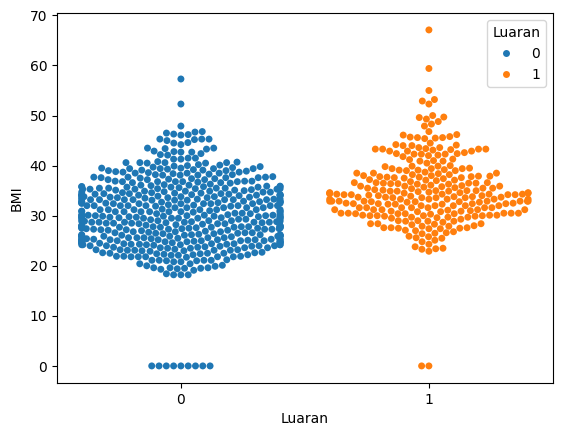

In [19]:
sns.swarmplot(x='Luaran',y='BMI',data=diabetes, hue='Luaran')

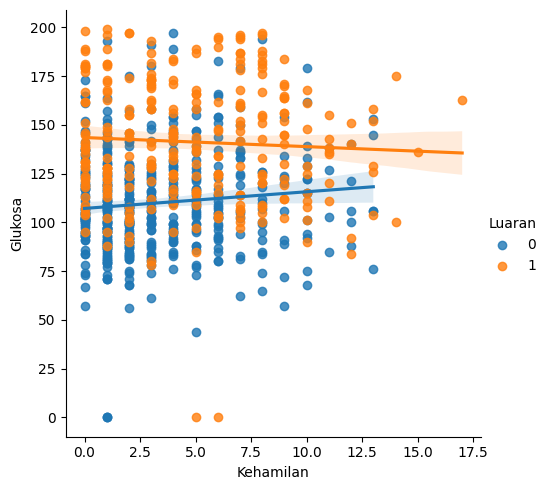

In [20]:
p=sns.lmplot(x='Kehamilan',y='Glukosa',data=diabetes,hue="Luaran")   #regresi linear antara kehamilan dan glukosa untuk 2 kelompok data

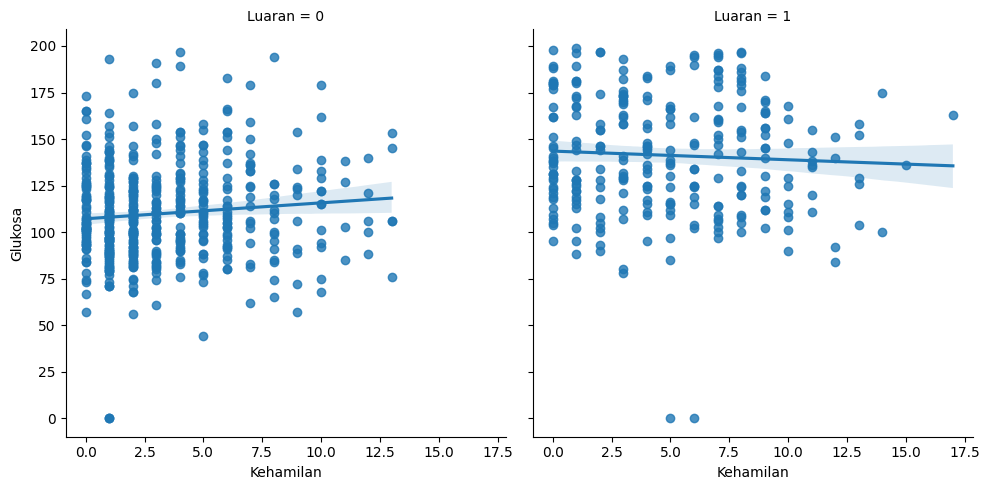

In [21]:
g = sns.lmplot(x="Kehamilan", y="Glukosa", col="Luaran", data=diabetes)

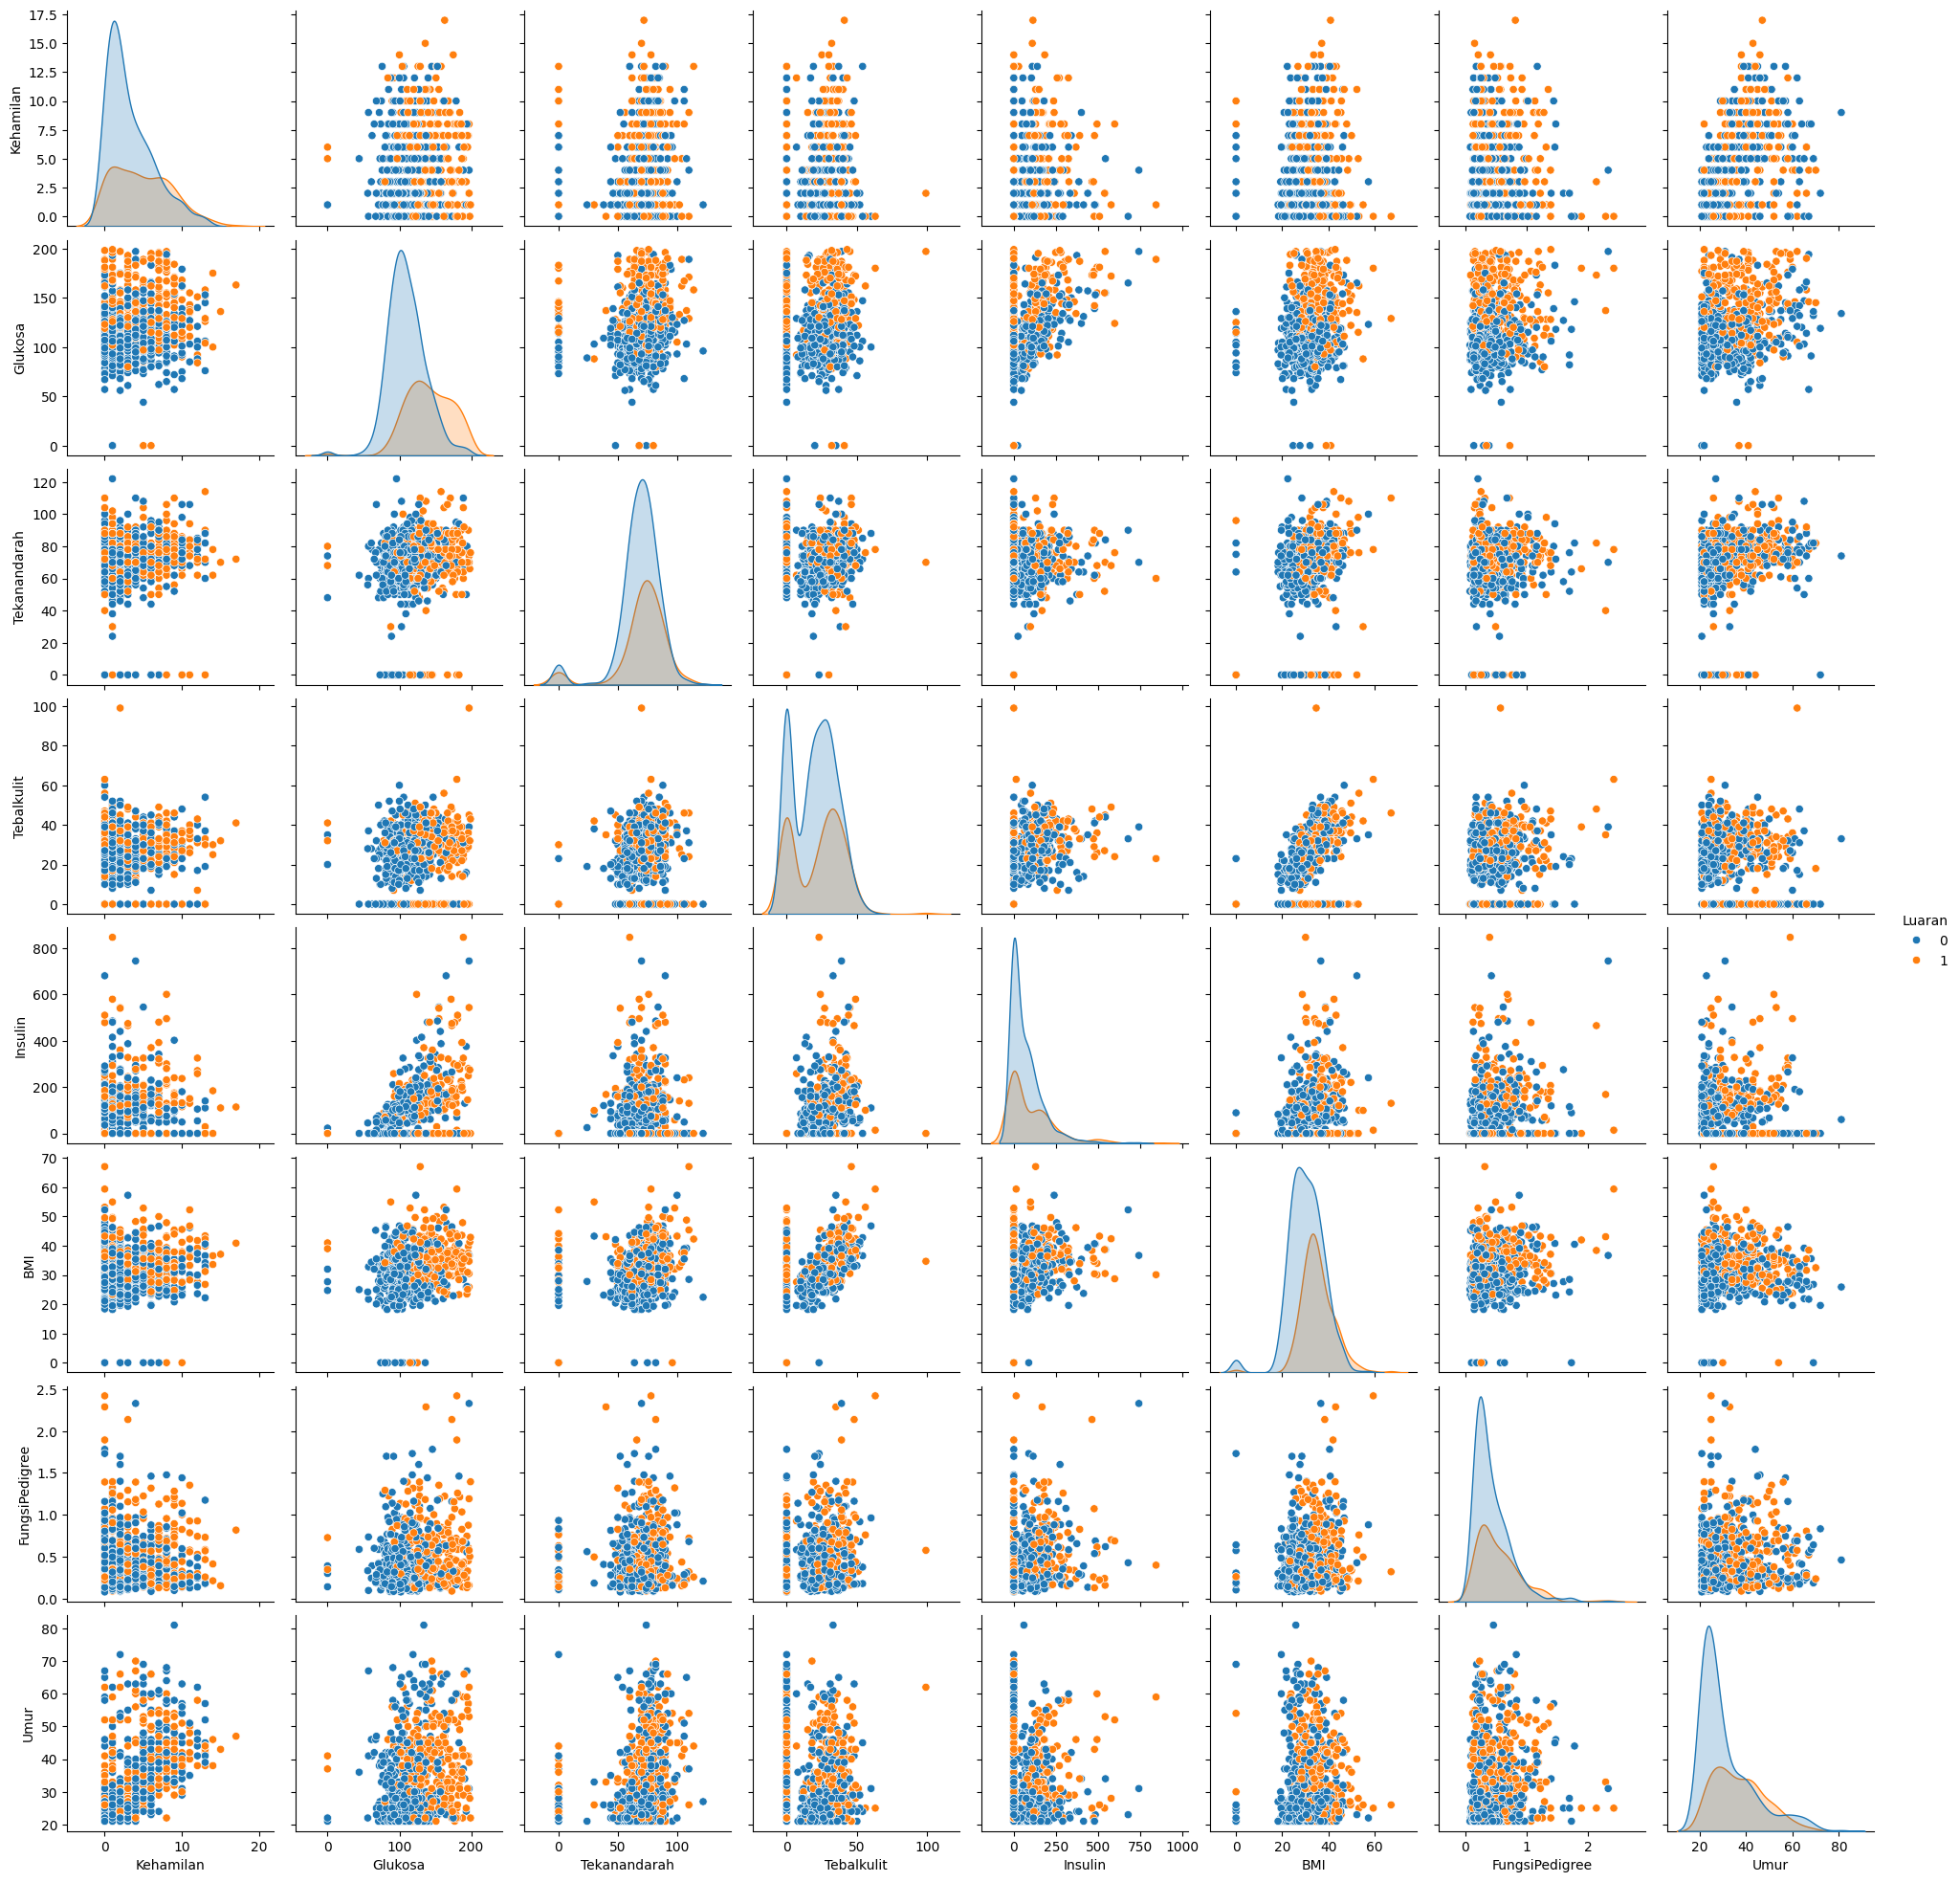

In [22]:
aa=sns.pairplot(diabetes,hue='Luaran')

In [23]:
#Langkah 7. Perintah untuk menelusur banyaknya data bertekanan darah 0
print("Total : ", diabetes[diabetes.Tekanandarah == 0].shape[0])


Total :  35


In [24]:
diabetes.sample(6)

Kehamilan  Glukosa  Tekanandarah  Tebalkulit  Insulin   BMI  \
264          4      123            62           0        0  32.0   
656          2      101            58          35       90  21.8   
731          8      120            86           0        0  28.4   
197          3      107            62          13       48  22.9   
324          2      112            75          32        0  35.7   
508          2       84            50          23       76  30.4   

     FungsiPedigree  Umur  Luaran  
264           0.226    35       1  
656           0.155    22       0  
731           0.259    22       1  
197           0.678    23       1  
324           0.148    21       0  
508           0.968    21       0

In [25]:
#Langkah 8.  Mencermati level glukosa plasma : sekalipun sudah puasa, level glukosa tidak mungkin 0
#sehingga jika level glukosa bernilai 0 berarti terdapat kesalahan data.
#Dengan mengobservasi data, maka diperoleh 5 orang mempunyai nilai glukosa 0
print("Total : ", diabetes[diabetes.Glukosa == 0].shape[0])


Total :  5


In [26]:
diabetes.shape

(768, 9)

In [27]:
#Langkah 9. Dari 5 orang di atas akan dicermati berapa orang yang teridentifikasi diabetes (berlabel 1)
# dan yang tidak diabetes (berlabel 0)
print(diabetes[diabetes.Glukosa == 0].groupby('Luaran')['Umur'].count())


Luaran
0    3
1    2
Name: Umur, dtype: int64


In [28]:
diabetes.dtypes

Kehamilan           int64
Glukosa             int64
Tekanandarah        int64
Tebalkulit          int64
Insulin             int64
BMI               float64
FungsiPedigree    float64
Umur                int64
Luaran              int64
dtype: object

In [29]:
print("banyaknya kehamilan",diabetes['Kehamilan'].count())

banyaknya kehamilan 768


<Axes: xlabel='Luaran', ylabel='Tekanandarah'>

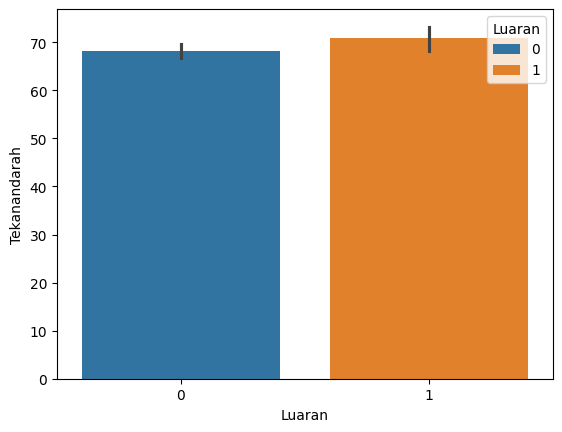

In [30]:
sns.barplot(x='Luaran',y='Tekanandarah',data=diabetes,hue="Luaran")

<Axes: xlabel='Luaran', ylabel='Umur'>

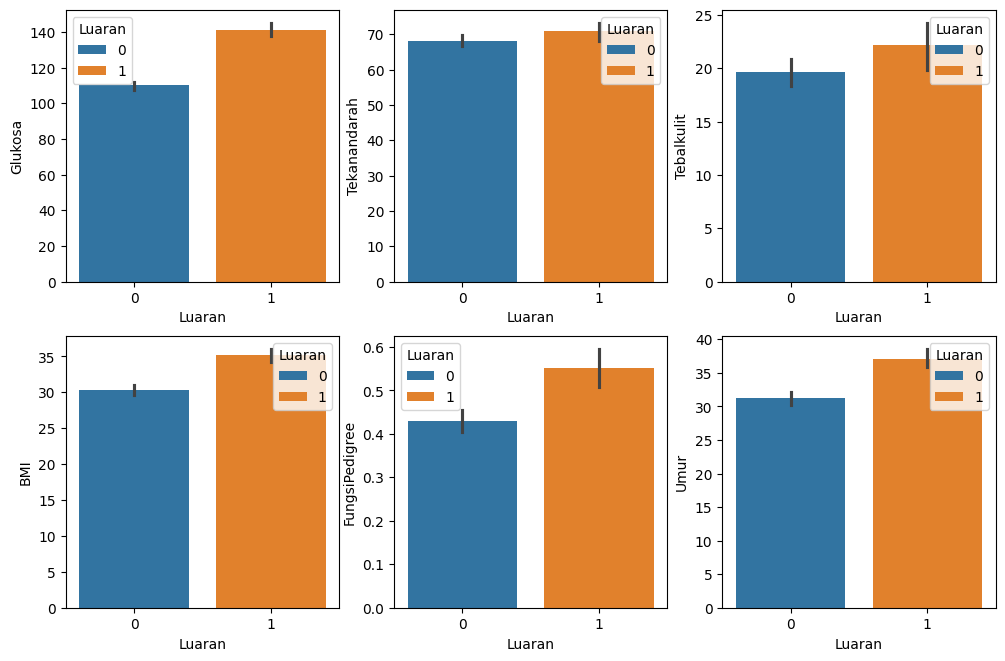

In [31]:
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.barplot(x='Luaran',y='Glukosa',data=diabetes,hue="Luaran")
plt.subplot(3,3,2)
sns.barplot(x='Luaran',y='Tekanandarah',data=diabetes,hue="Luaran")
plt.subplot(3,3,3)
sns.barplot(x='Luaran',y='Tebalkulit',data=diabetes,hue="Luaran")
plt.subplot(3,3,4)
sns.barplot(x='Luaran',y='BMI',data=diabetes,hue="Luaran")
plt.subplot(3,3,5)
sns.barplot(x='Luaran',y='FungsiPedigree',data=diabetes,hue="Luaran")
plt.subplot(3,3,6)
sns.barplot(x='Luaran',y='Umur',data=diabetes,hue="Luaran")

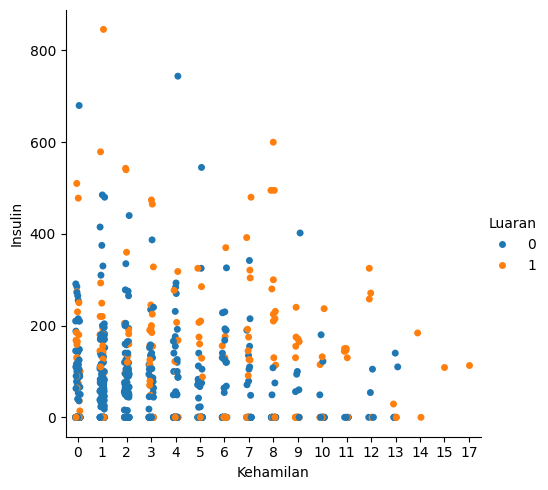

In [32]:
sns.catplot(x='Kehamilan',y='Insulin',data=diabetes,hue='Luaran')

In [33]:
#Langkah 10. Demikian  pula kita akan mencermati berdasarkan Tebal kulit dimana orang normal
# ketebalan bawah kulit tidak boleh lebih kecil dari 10 mm. Dari program diperoleh bahwa yang
 # bernilai 0 sebanyak 227.
#Program
print("Total : ", diabetes[diabetes.Tebalkulit < 10].shape[0])
print(diabetes[diabetes.Tebalkulit < 10].groupby('Luaran')['Umur'].count())


Total :  231
Luaran
0    142
1     89
Name: Umur, dtype: int64


In [ ]:
#Langkah 11. Demikian pula untuk BMI, tidak boleh teridentifikasi BMI bernilai 0 ,
# untuk itu dihitung berapa orang BMI bernilai 0
#BMI tidak boleh lebih kecil dari nol
print("Total : ", diabetes[diabetes.BMI == 0].shape[0])
print(diabetes[diabetes.BMI == 0].groupby('Luaran')['Umur'].count())


Total :  11
Luaran
0    9
1    2
Name: Umur, dtype: int64


In [34]:
#Langkah 12. Secara sama , kita dapat mengidentifikasi kadar insulin pada tiap klas.
print("Total : ", diabetes[diabetes.Insulin == 0].shape[0])
print(diabetes[diabetes.Insulin == 0].groupby('Luaran')['Umur'].count())


Total :  374
Luaran
0    236
1    138
Name: Umur, dtype: int64


In [35]:
#Langkah 13.  Untuk mengedit data
#Data –data diatas dibaca dan dikatakan invalid. Untuk mengatasi data invalid,
#kita akan melakukan pembersihan data dengan menghapus faktor Tekanan darah, BMI dan Glukosa yang bernilai 0 pada program berikut
diabetes_mod = diabetes[(diabetes.Tekanandarah != 0) & (diabetes.BMI != 0) & (diabetes.Glukosa != 0)]
print(diabetes_mod.shape)


(724, 9)


In [36]:
#Proses teknis
namafaktor = ['Kehamilan', 'Glukosa', 'Tekanandarah', 'Tebalkulit', 'Insulin', 'BMI', 'FungsiPedigree', 'Umur']
X = diabetes_mod[namafaktor]
y = diabetes_mod.Luaran


In [37]:
print(diabetes_mod.iloc[0:5, 1:4]) # print5 baris pertama  dimana baris 0 adalah judul shg data tampil baris ke 1 mulai angka 0 dan 3 kolom pertama

   Glukosa  Tekanandarah  Tebalkulit
0      148            72          35
1       85            66          29
2      183            64           0
3       89            66          23
4      137            40          35


In [38]:
#Langkah 16. Mengimport fungsi-fungsi yang diperlukan

#Program
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold # ini ditambahkan krn tidk ada tetapi perlu



In [46]:
#Langkah 17. Pemisahan dengan Scikit Learn

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.Luaran, test_size=0.25,random_state=42)

In [47]:
print(X_train.iloc[0])

Kehamilan           2.000
Glukosa           110.000
Tekanandarah       74.000
Tebalkulit         29.000
Insulin           125.000
BMI                32.400
FungsiPedigree      0.698
Umur               27.000
Name: 85, dtype: float64


In [48]:
len(X_train)

543

In [49]:
len(X_test)

181

In [44]:
prosentase=len(X_test)/len(diabetes_mod)*100

In [45]:
print(prosentase)

25.0


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# Assuming you have X_train, X_test, y_train, y_test defined somewhere

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define your models
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),  # Increase max_iter
    ("Random Forest", RandomForestClassifier())
]
# Define your models
models = [
    ("Log.Regression", LogisticRegression(max_iter=1000)),  # Increase max_iter
    ("Rand.Forest", RandomForestClassifier()),
    ("SVC", SVC()),
    ("KNN", KNeighborsClassifier())
]

# Fit the models and collect scores
names = []
scores = []
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

# Create a DataFrame to display the results
tr_split = pd.DataFrame({'Nama': names, 'Nilai': scores})
print(tr_split)

             Nama     Nilai
0  Log.Regression  0.690608
1     Rand.Forest  0.712707
2             SVC  0.723757
3             KNN  0.707182


In [56]:

from sklearn.model_selection import KFold, cross_val_score
import pandas as pd

# Assuming you have models, X, y defined somewhere

names = []
scores = []
for name, model in models:
    kfold = KFold(n_splits=4, shuffle=True)  # Option 1: Set shuffle=True
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Nama': names, 'Nilai': scores})
print(kf_cross_val)

             Nama     Nilai
0  Log.Regression  0.763812
1     Rand.Forest  0.747238
2             SVC  0.758287
3             KNN  0.729282


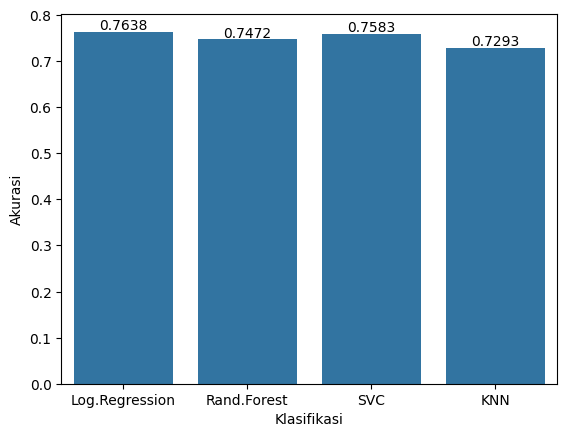

In [57]:
#Langkah 19. Bagian ini merupakan bagian yang menampilkan tabel akurasi dengan grafik dan
# kita menggunakan menu seabond untuk itu.


#Program
axis = sns.barplot(x = 'Nama', y = 'Nilai', data = kf_cross_val)
axis.set(xlabel='Klasifikasi', ylabel='Akurasi')
for p in axis.patches:
    tinggi = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, tinggi + 0.005, '{:1.4f}'.format(tinggi), ha="center")

plt.show()




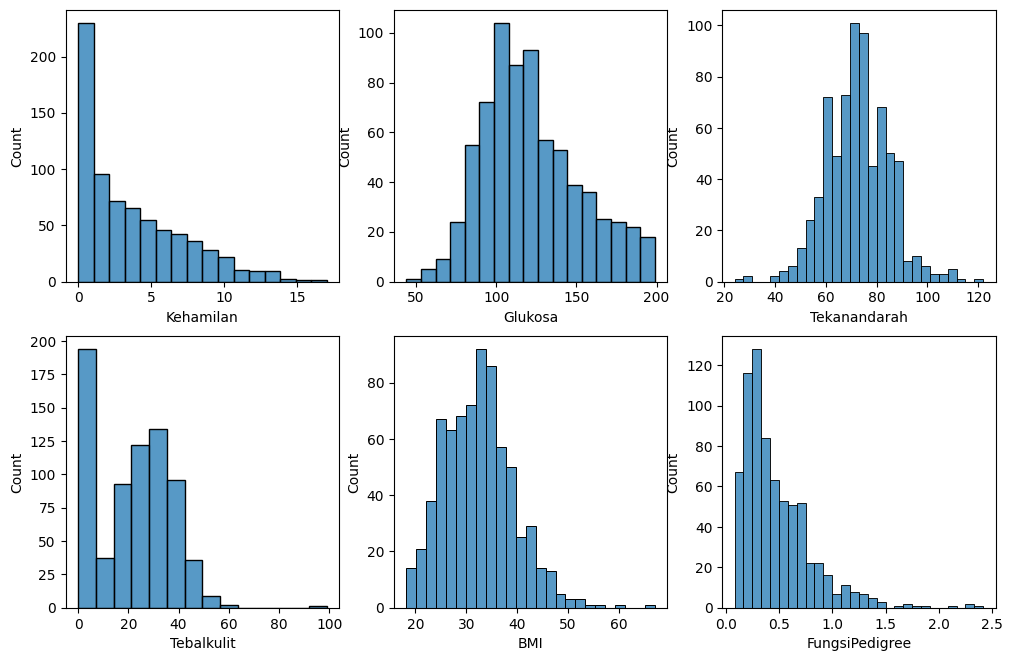

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.subplot(3, 3, 1)
sns.histplot(diabetes_mod['Kehamilan'])
plt.subplot(3, 3, 2)
sns.histplot(diabetes_mod['Glukosa'])
plt.subplot(3, 3, 3)
sns.histplot(diabetes_mod['Tekanandarah'])
plt.subplot(3, 3, 4)
sns.histplot(diabetes_mod['Tebalkulit'])
plt.subplot(3, 3, 5)
sns.histplot(diabetes_mod['BMI'])
plt.subplot(3, 3, 6)
sns.histplot(diabetes_mod['FungsiPedigree'])
plt.show()

<Axes: xlabel='Kehamilan', ylabel='Umur'>

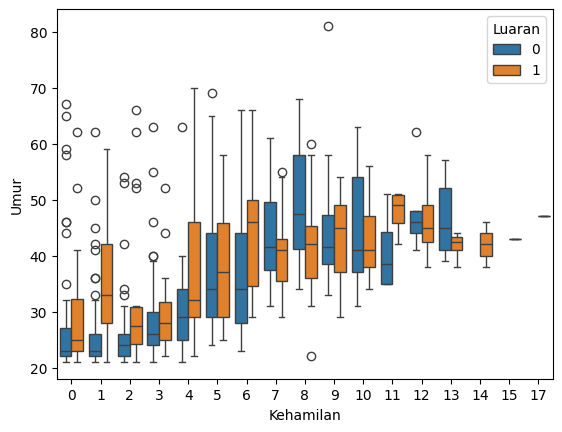

In [ ]:
sns.boxplot(x="Kehamilan",y="Umur",data=diabetes_mod,hue="Luaran")

<Axes: xlabel='Kehamilan', ylabel='count'>

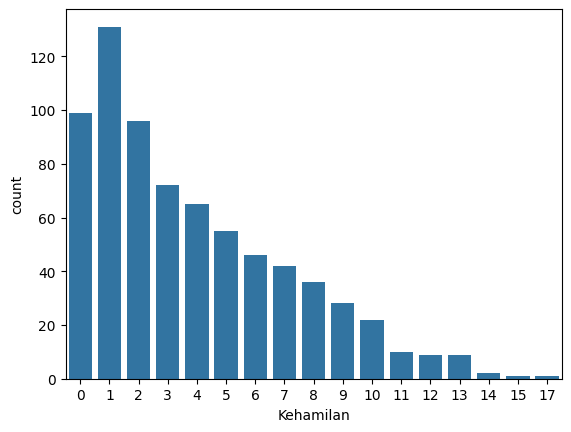

In [ ]:
sns.countplot(x="Kehamilan",data=diabetes_mod)

In [59]:
#Data sudah bersih dikoleksi dan diolah hanya data yang bersih
#Memanggil data yang bersih saja setelah observasi di atas
diabetes_mod = diabetes[(diabetes.Tekanandarah != 0) & (diabetes.BMI != 0) & (diabetes.Glukosa != 0)]
print(diabetes_mod.shape)


(724, 9)


Predicted Outcome: [0]


In [62]:
#Menyimpannya dalam file :
#menyimpan data pada file Simpan. csv
diabetes_mod.to_csv('Cleandiabetes.csv')


In [ ]:
#mEMULAI PEMODELAN SETELAH DIKETAHUI MODEL YANG TERBAIK ADALAH LogisticRegression

In [ ]:
get_ipython().magic(u'matplotlib inline')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#diabetes = pd.read_csv('')
#diabetes.columns

diabetes_mod = diabetes[(diabetes.Tekanandarah != 0) & (diabetes.BMI != 0) & (diabetes.Glukosa != 0)]
print(diabetes_mod.shape)

#menyimpan data pada file Cleandiabetes. csv
diabetes_mod.to_csv('Cleandiabetes.csv')



(724, 9)


In [ ]:
#mulai LR : https://www.kaggle.com/mshirlaw/pima-indians-diabetes-simple-logistic-regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

data = pd.read_csv('Cleandiabetes.csv')
data.head()


Unnamed: 0  Kehamilan  Glukosa  Tekanandarah  Tebalkulit  Insulin   BMI  \
0           0          6      148            72          35        0  33.6   
1           1          1       85            66          29        0  26.6   
2           2          8      183            64           0        0  23.3   
3           3          1       89            66          23       94  28.1   
4           4          0      137            40          35      168  43.1   

   FungsiPedigree  Umur  Luaran  
0           0.627    50       1  
1           0.351    31       0  
2           0.672    32       1  
3           0.167    21       0  
4           2.288    33       1

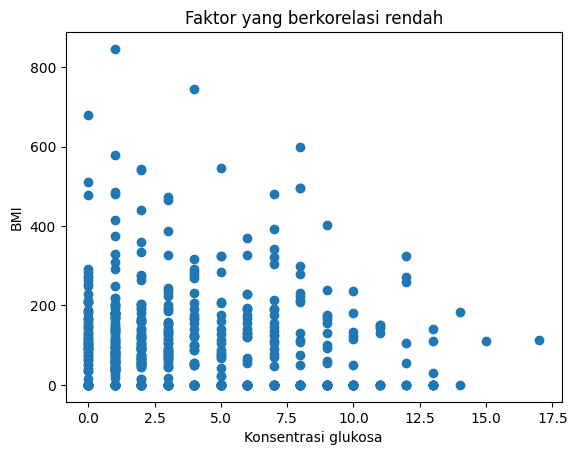

In [ ]:
#Tahap 3.
#Kita melakukan proses statistik sederhana : melihat korelasi
correlations = data.corr()
correlations['Luaran'].sort_values(ascending=False)


def visualisasi(data):
    fig, ax = plt.subplots()
    ax.scatter(data.iloc[:,1].values, data.iloc[:,5].values)
    ax.set_title('Faktor yang berkorelasi rendah')
    ax.set_xlabel('Konsentrasi glukosa')
    ax.set_ylabel('BMI')

visualisasi(data)



In [ ]:
# In[12]:


X = data[['Glukosa','BMI']].values
y = data[['Luaran']].values

#Tahap 4.
#Pada bagian ini kita akan melakukan transformasi dimana data ( 2 var di atas :Glukosa dan BMI mempunyai
#standar deviasi 1 dan rata-rata 0

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


Rerata = np.mean(X, axis=0)
print('Rata-rata: (%d, %d)' % (Rerata[0], Rerata[1]))
standard_deviasi = np.std(X, axis=0)
print('Standard deviasi: (%d, %d)' % (standard_deviasi[0], standard_deviasi[1]))


Rata-rata: (0, 0)
Standard deviasi: (1, 1)


In [ ]:
print(X[0:10,:])

[[ 0.84993279  0.16456174]
 [-1.20026207 -0.85226209]
 [ 1.98892994 -1.33162189]
 [-1.07009096 -0.63437127]
 [ 0.49196226  1.54453693]
 [-0.19143602 -0.99752263]
 [-1.42806149 -0.21311568]
 [ 2.4445288  -0.28574595]
 [-0.38669268  0.74560393]
 [ 1.50078831  0.80370815]]


In [ ]:
#Tahap 5.
#Berikutnya kita melakukan pemisahan data dari data training dan data uji dimana data training sebanya 80% dan data uji 20%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [ ]:

#Tahap 6.
#Selanjutnya kita melakukan Regresi logistik terhadap data latih (training data)
#kemudian hasilnya dilakukan untuk data uji (menguji nilai y dengan X uji yang diberi nama X_test


from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)
print(y_pred-y_test) # mestinya selisih masing-masing 0, jika selisih tidak nol itulah yang tidak benar


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(y_pred)

[0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0]


In [ ]:
len(y_pred)

145

In [ ]:
#Tahap 7.
#Terdapat beberapa cara mengevaluasi model, akan tetapi pada bagian ini digunakan cara menghitung confusion matrix


# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[81, 16],
       [19, 29]])

In [ ]:
len(y_test)

145

In [ ]:
#Lakukan regresi logistik
#dengan yang dasar
logreg = LogisticRegression()

# Cocokkan model dengan data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)


#Evaluasi model dengan CM
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[81, 16],
       [19, 29]])

In [ ]:
print("Akurasi:",metrics.accuracy_score(y_test, y_pred))
print("Presisi:",metrics.precision_score(y_test, y_pred))
print("Kembalimemanggil Score:",metrics.recall_score(y_test, y_pred))



Akurasi: 0.7586206896551724
Presisi: 0.6444444444444445
Kembalimemanggil Score: 0.6041666666666666


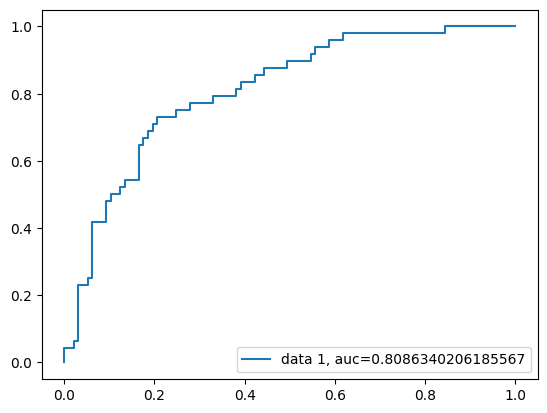

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()



In [ ]:
#from sklearn.linear_model import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[78, 19],
       [15, 33]])

In [ ]:
import numpy as np
lr_list = [0.01,0.02,0.03,0.04,0.05,0.075, 0.1, 0.25,0.3,0.4,0.5,0.6,0.75,0.8,0.9,1]

y_train_1d = np.ravel(y_train)
y_test_1d = np.ravel(y_test)

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=8, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train_1d)

    print("Laju pembelajaran: ", learning_rate)
    print("Nilai akurasi(training): {0:.3f}".format(gb_clf.score(X_train, y_train_1d)))
    print("Nilai akurasi dari (validation): {0:.3f}".format(gb_clf.score(X_test, y_test_1d)))

Laju pembelajaran:  0.01
Nilai akurasi(training): 0.653
Nilai akurasi dari (validation): 0.669
Laju pembelajaran:  0.02
Nilai akurasi(training): 0.748
Nilai akurasi dari (validation): 0.745
Laju pembelajaran:  0.03
Nilai akurasi(training): 0.751
Nilai akurasi dari (validation): 0.759
Laju pembelajaran:  0.04
Nilai akurasi(training): 0.751
Nilai akurasi dari (validation): 0.759
Laju pembelajaran:  0.05
Nilai akurasi(training): 0.751
Nilai akurasi dari (validation): 0.759
Laju pembelajaran:  0.075
Nilai akurasi(training): 0.763
Nilai akurasi dari (validation): 0.766
Laju pembelajaran:  0.1
Nilai akurasi(training): 0.772
Nilai akurasi dari (validation): 0.772
Laju pembelajaran:  0.25
Nilai akurasi(training): 0.793
Nilai akurasi dari (validation): 0.759
Laju pembelajaran:  0.3
Nilai akurasi(training): 0.798
Nilai akurasi dari (validation): 0.766
Laju pembelajaran:  0.4
Nilai akurasi(training): 0.800
Nilai akurasi dari (validation): 0.759
Laju pembelajaran:  0.5
Nilai akurasi(training): 0.8

In [ ]:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, n_iter_no_change=None,
              random_state=None, subsample=1.0, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingClassifier(loss='deviance')

In [ ]:
import numpy as np

y_train_reshaped = np.ravel(y_train)

In [ ]:
gb_clf.fit(X_train, y_train_reshaped)

GradientBoostingClassifier(learning_rate=1, max_depth=2, max_features=8,
                           n_estimators=20, random_state=0)

In [ ]:
y_pred = gb_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model: {:.2f}".format(accuracy))

Akurasi model: 0.76


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# 1. Melakukan prediksi pada data uji
y_pred = gb_clf.predict(X_test)

# 2. Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model: {:.2f}".format(accuracy))

Akurasi model: 0.76


YANG DIBAWAH BELUM SAJA

In [ ]:
#https://www.kaggle.com/htoukour/neural-networks-to-predict-diabetes
## Import Keras untuk deep learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

In [ ]:
X = data.iloc[:, :-1].values
y = data["Luaran"].values

In [ ]:
# Split the data to Train, and Test (75%, 25%)
#Pisahkan data menjadi Train dan Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
np.mean(y), np.mean(1-y)

(0.34392265193370164, 0.6560773480662984)

In [ ]:

#Hasil tersebut tentang 35% pasien mempunyai diabetes, sedang 65% tidak. Hal ini memberikan 65 akurasi tanpa model
#Kita akan menghitung nilai ROC-AUC untuk mengevaluasi performansi model dan juga melihat akurasi dapat ditingkatkan.

#Bedasarkan performansi Random Forest , kita akan mencoba melatih model Random Forest dengan 200 pohon pada data training
#Kita akan menghitung akurasi dan nilai Roc_auc


In [ ]:
## Train the RF Model
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:

#Buat prediksi pada data uji :
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)


print('akurasi {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('ROC-auc  {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

akurasi 0.785
ROC-auc  0.840


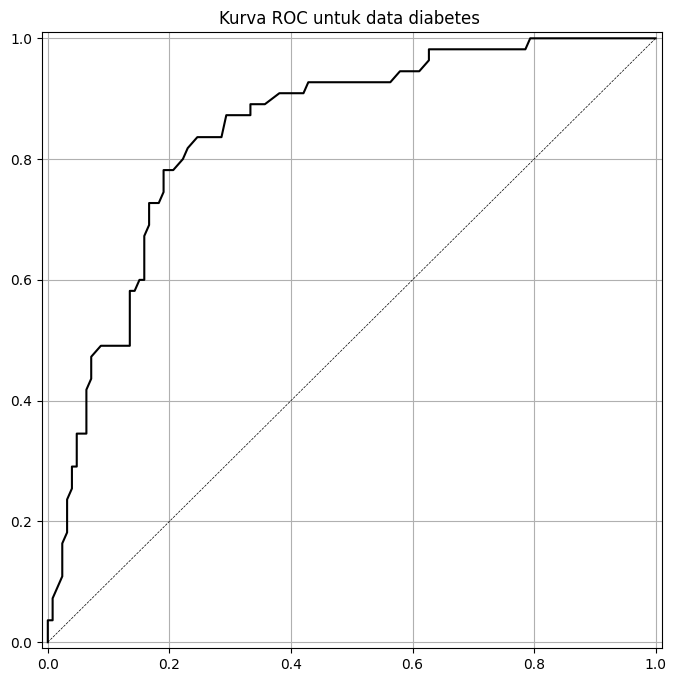

In [ ]:
 def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model #kurva roc untuk model random
    ax.grid(True)
    ax.set(title='Kurva ROC untuk data diabetes '.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])


plot_roc(y_test, y_pred_prob_rf[:, 1], 'RF')

In [ ]:
#CARA LAIN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


ROC (Receiver Operating Characteristic) Curve adalah salah satu alat evaluasi kinerja yang digunakan dalam klasifikasi untuk mengilustrasikan kinerja model secara keseluruhan di berbagai threshold. Biasanya, ROC Curve digunakan bersama dengan AUC (Area Under Curve), yang memberikan pengukuran kuantitatif tentang seberapa baik model dapat membedakan antara dua kelas. ROC Curve menggambarkan perbandingan antara True Positive Rate (TPR) dan False Positive Rate (FPR) pada berbagai nilai threshold. TPR didefinisikan sebagai:
TPR=TP/(TP+FN)
di mana TP adalah jumlah positif yang benar yang diprediksi dengan benar (true positives) dan  FN adalah jumlah positif yang sebenarnya tetapi salah diprediksi sebagai negatif (false negatives).
FPR didefinisikan sebagai:

di mana FP adalah jumlah negatif yang salah diprediksi sebagai positif (false positives) dan  TN adalah jumlah negatif yang benar yang diprediksi dengan benar (true negatives). ROC Curve memplot TPR pada sumbu Y terhadap FPR pada sumbu X.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

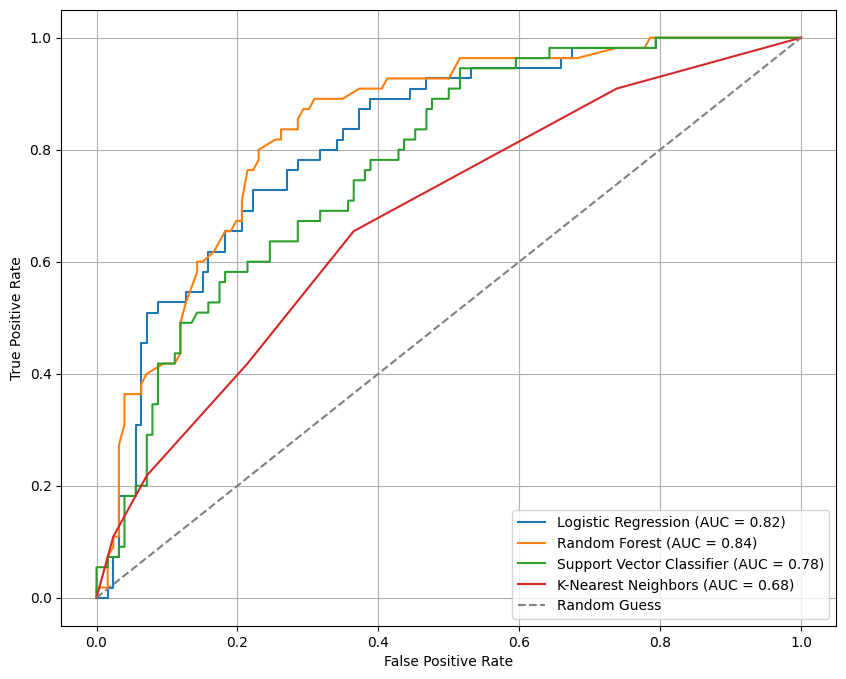

In [ ]:
# Define models
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Random Forest", RandomForestClassifier()),
    ("Support Vector Classifier", SVC(probability=True)),
    ("K-Nearest Neighbors", KNeighborsClassifier())
]

# Plot ROC curves
plt.figure(figsize=(10, 8))

for name, model in models:
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)  # Remove the second index
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Impor model yang ingin Anda gunakan
from sklearn.ensemble import RandomForestClassifier

# Latih model Anda menggunakan fitur yang disebutkan
model = RandomForestClassifier()
model.fit(X_train, y_train)  # Pastikan X_train berisi fitur-fitur yang disebutkan dan y_train berisi label keluaran

# Misalkan Anda memiliki data baru untuk diprediksi
new_data = [[6, 148, 72, 35, 0, 33.6, 0.627, 50,1]]  # Contoh data baru dengan fitur yang sama seperti yang digunakan untuk pelatihan

# Lakukan prediksi menggunakan model yang telah dilatih
predicted_outcome = model.predict(new_data)
print("Predicted Outcome:", predicted_outcome)

new_data = [
    [6, 148, 72, 35, 0, 33.6, 0.627, 50, 1],
    [1, 85, 66, 29, 0, 26.6, 0.351, 31, 0],
    [8, 183, 64, 0, 0, 23.3, 0.672, 32, 1],
    [1, 89, 66, 23, 94, 28.1, 0.167, 21, 0],
    [0, 137, 40, 35, 168, 43.1, 2.288, 33, 1]
]
# Lakukan prediksi menggunakan model yang telah dilatih
predicted_outcome = model.predict(new_data)
print("Predicted Outcome:", predicted_outcome)

Predicted Outcome: [0]
Predicted Outcome: [0 0 0 0 0]


BAGIAN II. NEURAL NETWORK

In [ ]:

# Bentuk model
# Ukuran input 8 dimensi
# 1 layer tersembunyi, 12 nodes tersembunyi, aktivasi sigmoid ()
# Layer terakhir hanya mempunyai 1 node
model_1 = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:

# # Menampilkan model dan menghitung parameter
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

model_1 = Sequential()
model_1.add(Dense(12, input_dim=9, activation='relu')) # Ubah input_dim menjadi 9 sesuai dengan jumlah fitur Anda
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(SGD(learning_rate=0.003), loss="binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200
17/17 [==============================] - 1s 12ms/step - loss: 0.9692 - accuracy: 0.4328 - val_loss: 1.0831 - val_accuracy: 0.3978
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 0.9422 - accuracy: 0.4438 - val_loss: 1.0532 - val_accuracy: 0.4088
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 0.9170 - accuracy: 0.4420 - val_loss: 1.0253 - val_accuracy: 0.4088
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 0.8937 - accuracy: 0.4641 - val_loss: 0.9995 - val_accuracy: 0.4144
Epoch 5/200
17/17 [==============================] - 0s 4ms/step - loss: 0.8720 - accuracy: 0.4770 - val_loss: 0.9754 - val_accuracy: 0.4365
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 0.8518 - accuracy: 0.4880 - val_loss: 0.9530 - val_accuracy: 0.4420
Epoch 7/200
17/17 [==============================] - 0s 4ms/step - loss: 0.8330 - accuracy: 0.4862 - val_loss: 0.9321 - val_accuracy: 0.4530
Epoch 8/200


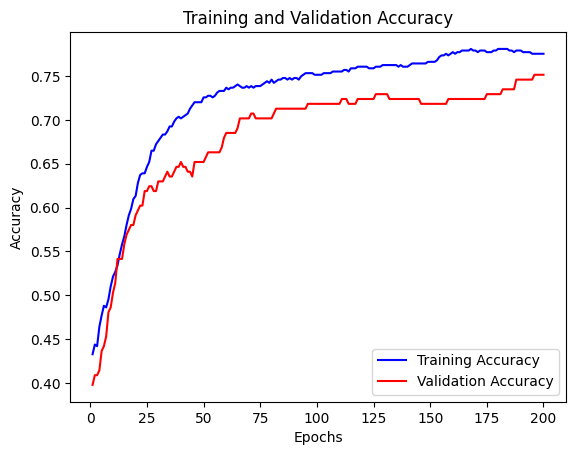

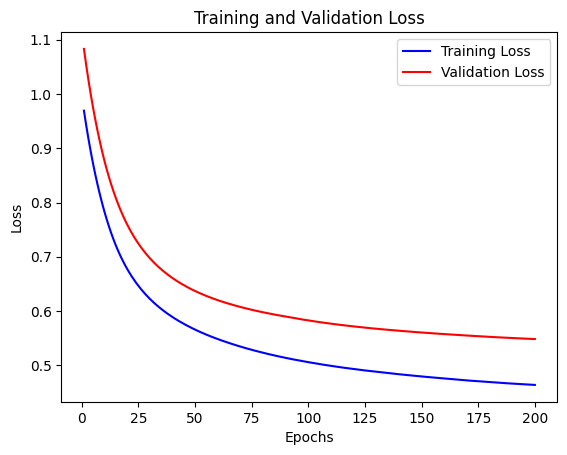

In [ ]:
import matplotlib.pyplot as plt

# Mengambil data akurasi dan loss dari riwayat pelatihan
accuracy = run_hist_1.history['accuracy']
val_accuracy = run_hist_1.history['val_accuracy']
loss = run_hist_1.history['loss']
val_loss = run_hist_1.history['val_loss']

# Mengambil jumlah epochs
epochs = range(1, len(accuracy) + 1)

# Plot Akurasi
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()